In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

path ='clean_df.csv'

df=pd.read_csv(path)

In [2]:
df1=df._get_numeric_data()

In [3]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
print("done")

done


/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
def DisPlot(Red,Blue,RedName,BlueName,Title):
    width =10
    height=10
    plt.figure(figsize=(width,height))
    ax1=sns.distplot(Red,hist=False,color='r',label=Red)
    ax2=sns.distplot(Blue,hist=False,color='b',label=Blue,ax=ax1)
    plt.title(Title)
    plt.show()
    plt.close()
    

In [5]:
def PollyPlot(xtrain,xtest,y_train,y_test,lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(),xtest.values.max()])

    xmin=min([xtrain.values.min(),xtest.values.min()])

    x=np.arange(xmin,xmax,0.1)


    plt.plot(xtrain,y_train,'ro',label='Training Data')
    plt.plot(xtest,y_test,'go',label='Test Data')
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label='Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('Price')
    plt.legend()

In [6]:
y=df['price']

In [7]:
x=df.drop('price',axis=1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=1)
print("Number of Test Samples:",x_test.shape)

Number of Test Samples: (31, 31)


In [10]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train[['horsepower']],y_train)
lm.score(x_test[['horsepower']],y_test)

0.70768837414670505

In [11]:
lm.score(x_train[['horsepower']],y_train)

0.64495174376596842

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

lm.fit(x_train[['horsepower']],y_train)

In [13]:
lm.fit(x_train[['horsepower']],y_train)
lm.score(x_train[['horsepower']],y_train)

0.6755325771980133

In [14]:
from sklearn.model_selection import cross_val_score
rcross=cross_val_score(lm,x[['horsepower']],y,cv=4)
rcross.mean()
rcross.std()

0.29118394447560292

In [15]:
rcross1=-1*cross_val_score(lm,x[['horsepower']], y,cv=4,scoring='neg_mean_squared_error')

In [16]:
rcross1

array([ 20254142.84026704,  43745493.26505169,  12539630.34014932,
        17561927.72247591])

In [17]:
rcross1.mean()

23525298.541985989

In [18]:
rcross2=cross_val_score(lm,x[['horsepower']],y,cv=2)
rcross2.mean()

0.51667616971274288

In [19]:
from sklearn.model_selection import cross_val_predict

In [20]:
lre=LinearRegression()

In [21]:
yhat=cross_val_predict(lre,x[['horsepower']],y,cv=4)
yhat

array([ 14141.63807508,  14141.63807508,  20814.29423473,  12745.03562306,
        14762.35027598,  13986.46002486,  13986.46002486,  13986.46002486,
        18641.80153159,  12589.85757284,  12589.85757284,  15693.41857732,
        15693.41857732,  15693.41857732,  25159.27964101,  25159.27964101,
        25159.27964101,   4365.42091095,   7779.33801589,   7779.33801589,
         7468.98191544,   7468.98191544,  12745.03562306,   7468.98191544,
         7468.98191544,   7468.98191544,  12745.03562306,  10572.54291992,
        19417.69178271,   5917.2014132 ,   8710.40631723,   6227.55751364,
         8710.40631723,   8710.40631723,   8710.40631723,   8710.40631723,
        10262.18681948,  10262.18681948,  10262.18681948,  10262.18681948,
        12589.85757284,  12434.67952262,   9020.76241768,  10882.89902037,
        24228.21133966,  24228.21133966,  37573.52365895,   7468.98191544,
         7468.98191544,   7468.98191544,   7468.98191544,   7191.77534249,
        12625.21956696,  

In [22]:
lr=LinearRegression()
lr.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']],y_train)
lr.score(x_train[['horsepower','curb-weight','engine-size','highway-mpg']],y_train)

0.83086157764242952

In [23]:
yhat1=lr.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat1

array([ 26091.37901214,   7954.34606626,  26091.37901214,  19557.5951667 ,
         5822.61408773,  13518.06514028,  19409.27572317,  11263.11578128,
        16457.35762474,   9328.97617471,  34810.43924572,   9674.82679196,
         9574.04649114,  10091.75655107,  14835.77913619,   8020.16096204,
        17226.59767443,  25706.04902128,  20867.94356315,  10546.54101163,
        22049.00856681,   6063.59645365,   5456.46098059,   6434.19927374,
         7097.76479867,  19325.81493389,  39543.23139032,  11795.43237484,
         9350.79803982,  15422.76957983,  17936.22650862,  13929.95284645,
         7541.30098202,  11688.50270639,  17404.81378852,  23599.69056875,
        10318.7481441 ,  18396.21696632,   6327.26960528,   7423.54214914,
        45752.6639476 ,  15785.85067783,   5869.17887464,   6683.70183347,
         5766.77818878,   9978.34629665,  16748.98399326,   6371.66781244,
         8686.26281327,  10751.96151294,   6323.43237566,  11392.72750062,
         9542.83551162,  

In [24]:
yhat2=lr.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as ns

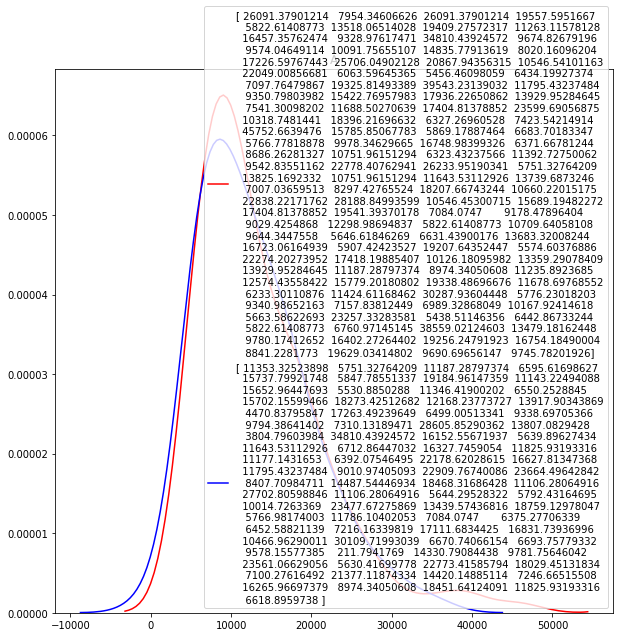

In [26]:
DisPlot(yhat1,yhat2,"Test1","Test2",'A')